In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## **(Tutorial) Binarizing data**

Following is a sample of binarizing listen counts in Million Song Dataset
### The Echo Nest Taste Profile Subset
https://drive.google.com/uc?export=download&id=1gPmTs2L9Xi77DrUVS6uHovitfzDlBpIY

In [2]:
listen_count = pd.read_csv('train_triplets.txt', header=None, delimiter='\t')
listen_count.head()  # user - song - count

FileNotFoundError: [Errno 2] No such file or directory: 'train_triplets.txt'

In [ ]:
np.max(listen_count[2])

np.int64(1890)

Binarizing and visualizing listen counts

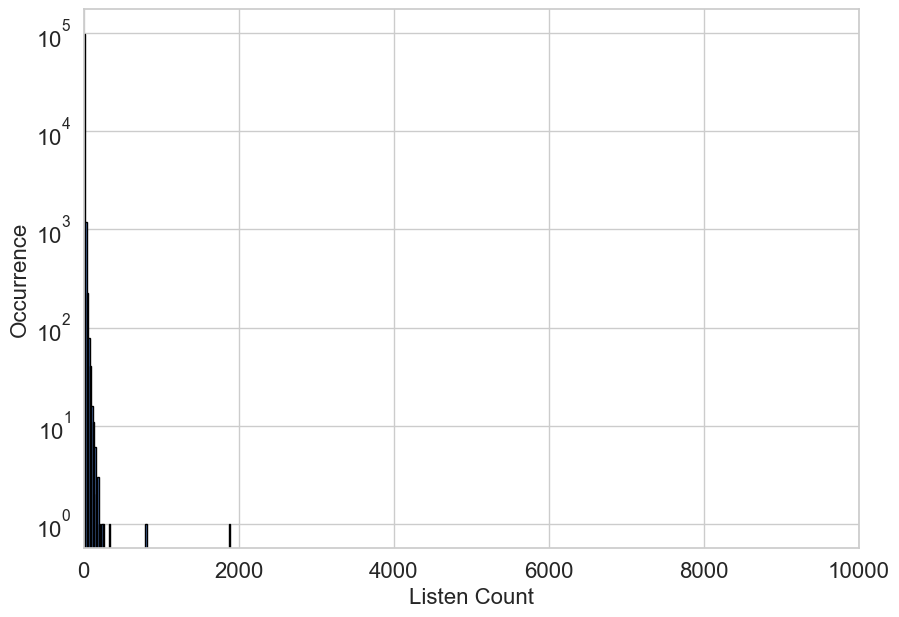

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.hist(listen_count[2], bins = 100, edgecolor='black')
plt.yscale('log', nonpositive='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,10000])
_ = plt.xlabel('Listen Count', fontsize=16)
_ = plt.ylabel('Occurrence', fontsize=16)

## **Task 1.1 Read data from Athletes.xlsx file and keep it in a proper type for the following operations**

### The athletes information of 2021 Olympics in Tokyo
https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo/download

In [ ]:
Athletes_df = pd.read_excel('archive/Athletes.xlsx')
Athletes_df.columns = ['Name', 'NOC', 'Discipline']
Athletes_df = Athletes_df.astype({'Name': str, 'NOC': str, 'Discipline': str})
Athletes_df.dropna(inplace=True)
Athletes_df.head()
Athletes_df.info()
Athletes_df = pd.read_excel('archive/Athletes.xlsx')
Athletes_df.head()
Athletes_df.info()
Athletes_df.describe()
Athletes_df.isnull().sum()
Athletes_df.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB


## **Task 1.2 Extracting the data in column 'NOC' and encoding them, then binarizing and visualizing them (number of athletes on x-axis, number of countries on y-axis)**

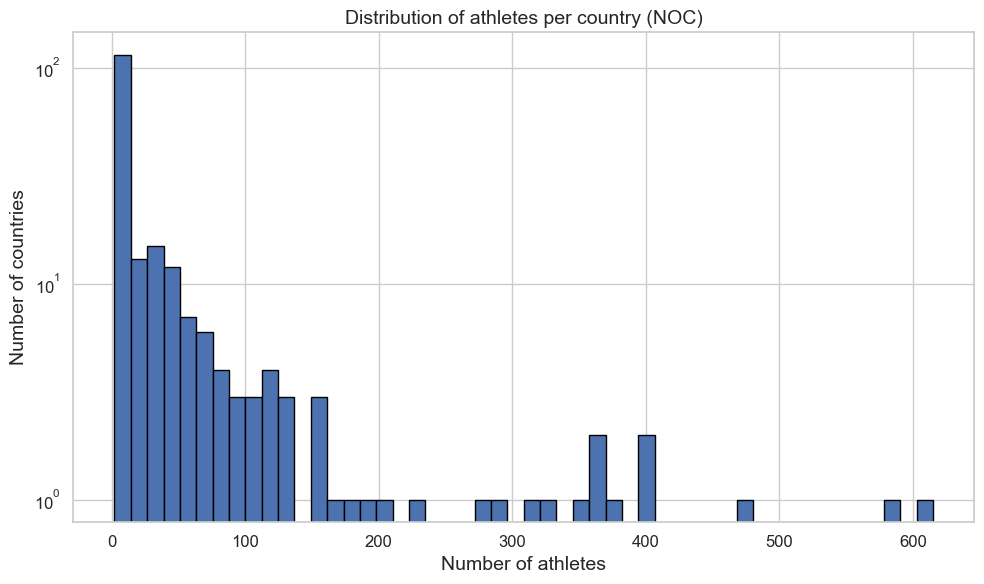

In [ ]:
# Extract NOC column and count athletes per country
athletes_per_country = Athletes_df['NOC'].value_counts()
# "Binarizing" here: we use the counts; histogram will show (x=number of athletes, y=number of countries)
counts = athletes_per_country.values

# Encode NOC to numeric (optional label encoding for reference)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Athletes_df['NOC_encoded'] = le.fit_transform(Athletes_df['NOC'])

# Visualize: x-axis = number of athletes, y-axis = number of countries
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=50, edgecolor='black')
plt.yscale('log', nonpositive='clip')
plt.xlabel('Number of athletes', fontsize=14)
plt.ylabel('Number of countries', fontsize=14)
plt.title('Distribution of athletes per country (NOC)', fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()


## **(Tutorial) Quantizing data**

In [ ]:
# create 20 random numbers in the range (0,100)
small_counts = np.random.randint(0, 100, 20)
small_counts

array([59, 73,  8, 59, 91, 44, 44, 41, 28, 65, 70, 14, 47, 91, 98,  3, 38,
        3, 63, 52])

In [ ]:
# divided by 10 to project digits into the range (0,10)
np.floor_divide(small_counts, 10)

array([5, 7, 0, 5, 9, 4, 4, 4, 2, 6, 7, 1, 4, 9, 9, 0, 3, 0, 6, 5])

In [ ]:
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

### Example: computing deciles of Yelp business review counts
Yelp_academic_dataset_business
https://github.com/melqkiades/yelp/blob/master/notebooks/yelp_academic_dataset_business.json

In [ ]:
import json

In [ ]:
def load_json_df(filename, num_bytes = -1):
    '''Load the first `num_bytes` of the filename as a json blob, convert each line into a row in a Pandas data frame.'''
    fs = open(filename, encoding='utf-8')
    df = pd.DataFrame([json.loads(x) for x in fs.readlines(num_bytes)])
    fs.close()
    return df

In [ ]:
biz_df = load_json_df('yelp_academic_dataset_business.json')
biz_df.shape

(15585, 15)

In [ ]:
biz_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",True,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,29,Turf Paradise Race Course,[],-112.092329,AZ,4.0,33.638573,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",business
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},True,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,3,Sam's Club Members Only,[],-112.234755,AZ,3.5,33.648545,"{'Parking': {'garage': False, 'street': False,...",business
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,7,Forever 21,[],-111.964485,AZ,3.5,33.383123,"{'Parking': {'garage': False, 'street': False,...",business
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",True,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,4,Loving Hands Pet Care,[],-111.857818,AZ,5.0,33.356472,{},business
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},True,"[Veterinarians, Pets]",Phoenix,3,Amec Mid-City Animal Hospital,[],-112.097232,AZ,5.0,33.538493,{},business


In [ ]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1     3.0
0.2     3.0
0.3     4.0
0.4     5.0
0.5     6.0
0.6     8.0
0.7    13.0
0.8    24.0
0.9    56.0
Name: review_count, dtype: float64

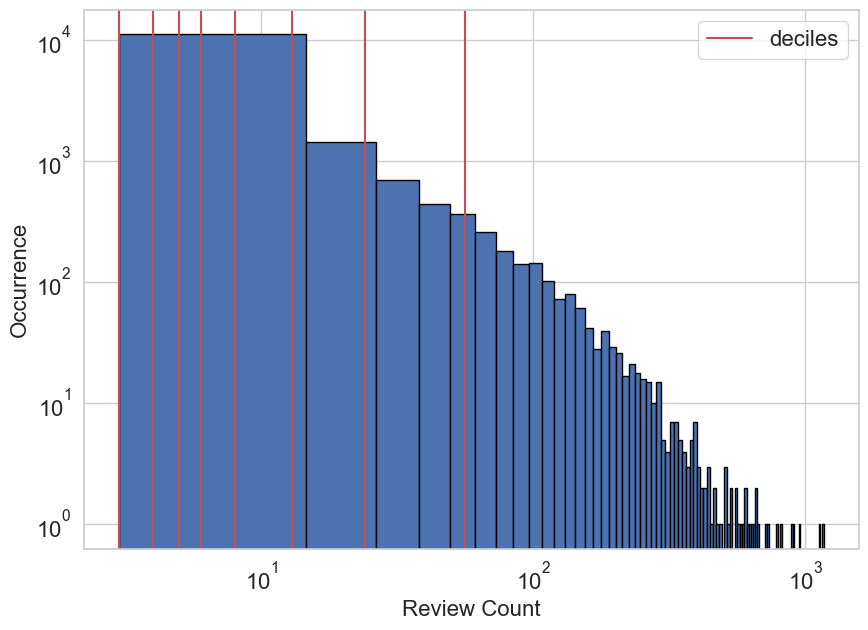

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
biz_df['review_count'].hist(ax=ax, bins=100, edgecolor='black')
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=16)
ax.set_xscale('log', nonpositive='clip')
ax.set_yscale('log', nonpositive='clip')
ax.tick_params(labelsize=16)
_ = ax.set_xlabel('Review Count', fontsize=16)
_ = ax.set_ylabel('Occurrence', fontsize=16)

## Task 2. Computing the quantiles of the number of athletes from each country and visualizing the histogram (data was used in task 1). Applying log transform on the number of athletes and visualizing the histogram again.

Quantiles (0%, 25%, 50%, 75%, 100%): [  2.     5.    10.    50.25 615.  ]


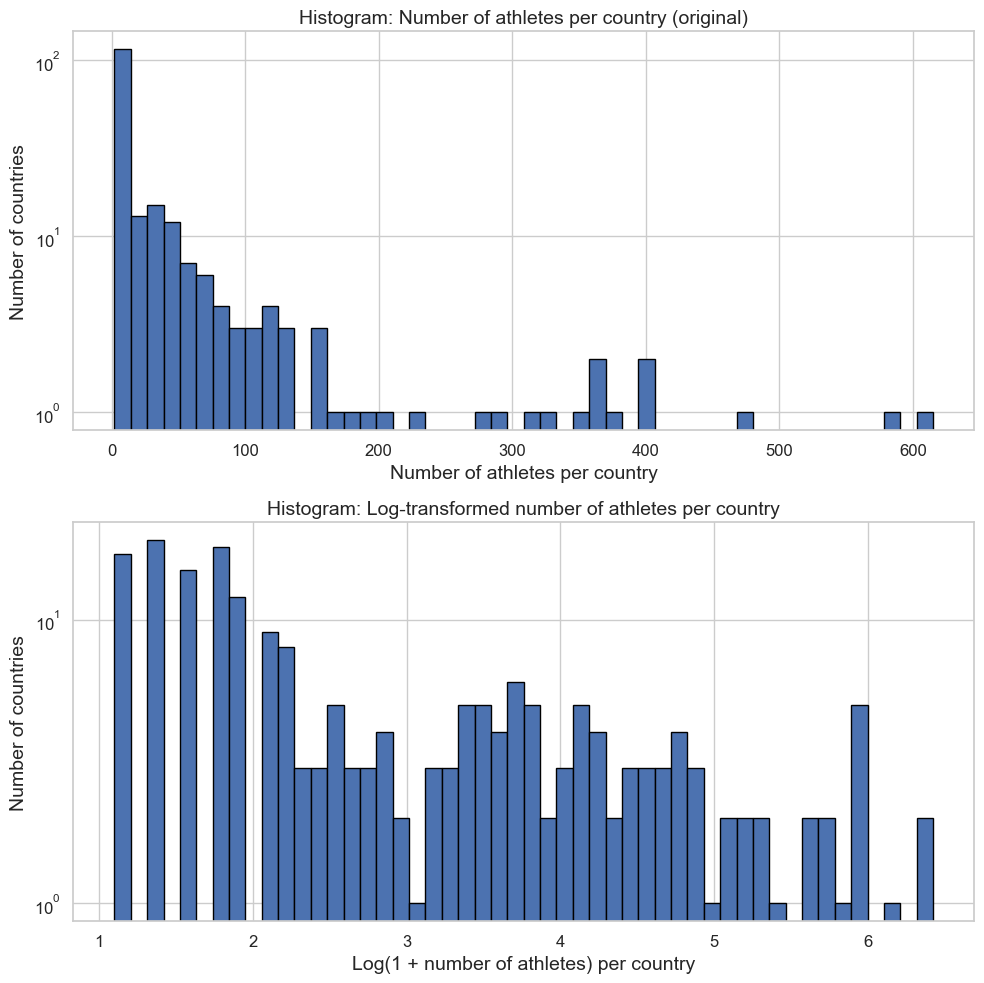

In [ ]:
# Use athletes per country from Task 1 (ensure we have the variable)
athletes_per_country = Athletes_df['NOC'].value_counts()
counts = athletes_per_country.values

# Compute quantiles of the number of athletes per country
quantiles = np.quantile(counts, [0, 0.25, 0.5, 0.75, 1.0])
print('Quantiles (0%, 25%, 50%, 75%, 100%):', quantiles)

# Visualize histogram of original counts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.hist(counts, bins=50, edgecolor='black')
ax1.set_yscale('log', nonpositive='clip')
ax1.set_xlabel('Number of athletes per country', fontsize=14)
ax1.set_ylabel('Number of countries', fontsize=14)
ax1.set_title('Histogram: Number of athletes per country (original)', fontsize=14)
ax1.tick_params(labelsize=12)

# Log transform: apply log to the counts
counts_log = np.log1p(counts)  # log(1+x) to handle zeros if any

# Visualize histogram of log-transformed counts
ax2.hist(counts_log, bins=50, edgecolor='black')
ax2.set_yscale('log', nonpositive='clip')
ax2.set_xlabel('Log(1 + number of athletes) per country', fontsize=14)
ax2.set_ylabel('Number of countries', fontsize=14)
ax2.set_title('Histogram: Log-transformed number of athletes per country', fontsize=14)
ax2.tick_params(labelsize=12)
plt.tight_layout()
plt.show()


## Question 1. Comparing the histograms before and after applying log transform and answer the question: why do we need to apply log transform on some data?

**Answer to Q1**: Type your answer here

---


## **(Tutorial) Box-Cox transform**

In [ ]:
x = np.arange(0.001, 3, 0.01)
lambda0 = np.log(x)
one_quarter = (x**0.25 - 1)/0.25
square_root = (x**0.5 - 1)/0.5
three_quarters = (x**0.75 - 1)/0.75
one_point_five = (x**1.5 - 1)/1.5

Text(0.5, 1.0, 'Box-Cox Transforms')

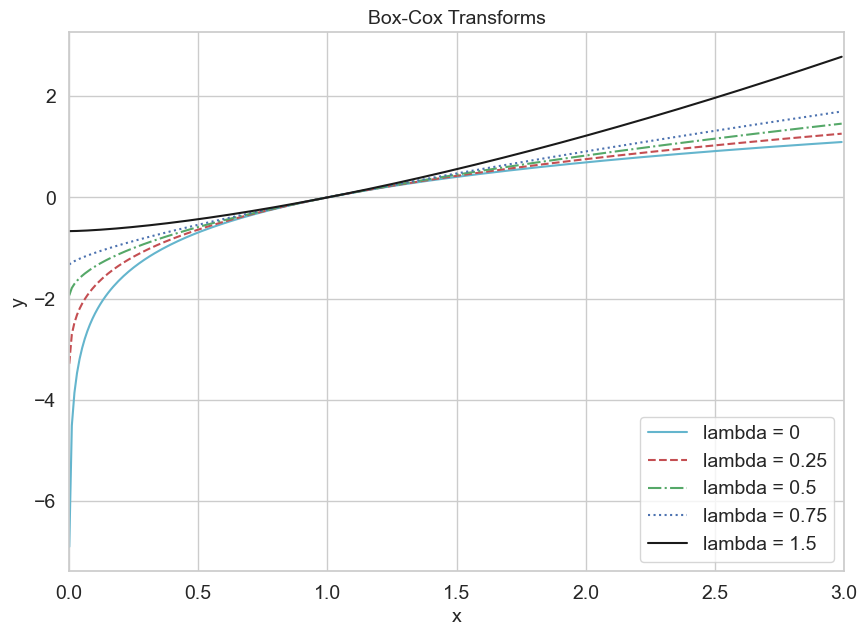

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(x, lambda0, 'c',
         x, one_quarter, 'r--',
         x, square_root, 'g-.',
         x, three_quarters, 'b:',
         x, one_point_five, 'k')
plt.legend(['lambda = 0', 'lambda = 0.25', 'lambda = 0.5', 'lambda = 0.75', 'lambda = 1.5'],
           loc='lower right',
           prop={'size': 14})
ax.tick_params(labelsize=14)
ax.set_xlim([0.0,3.0])
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Box-Cox Transforms', fontsize=14)

## Example: Visualizing the histograms of original, log transformed, and Box-Cox transformed review counts

In [ ]:
from scipy import stats

In [ ]:
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log

Text(0, 0.5, 'Occurrence')

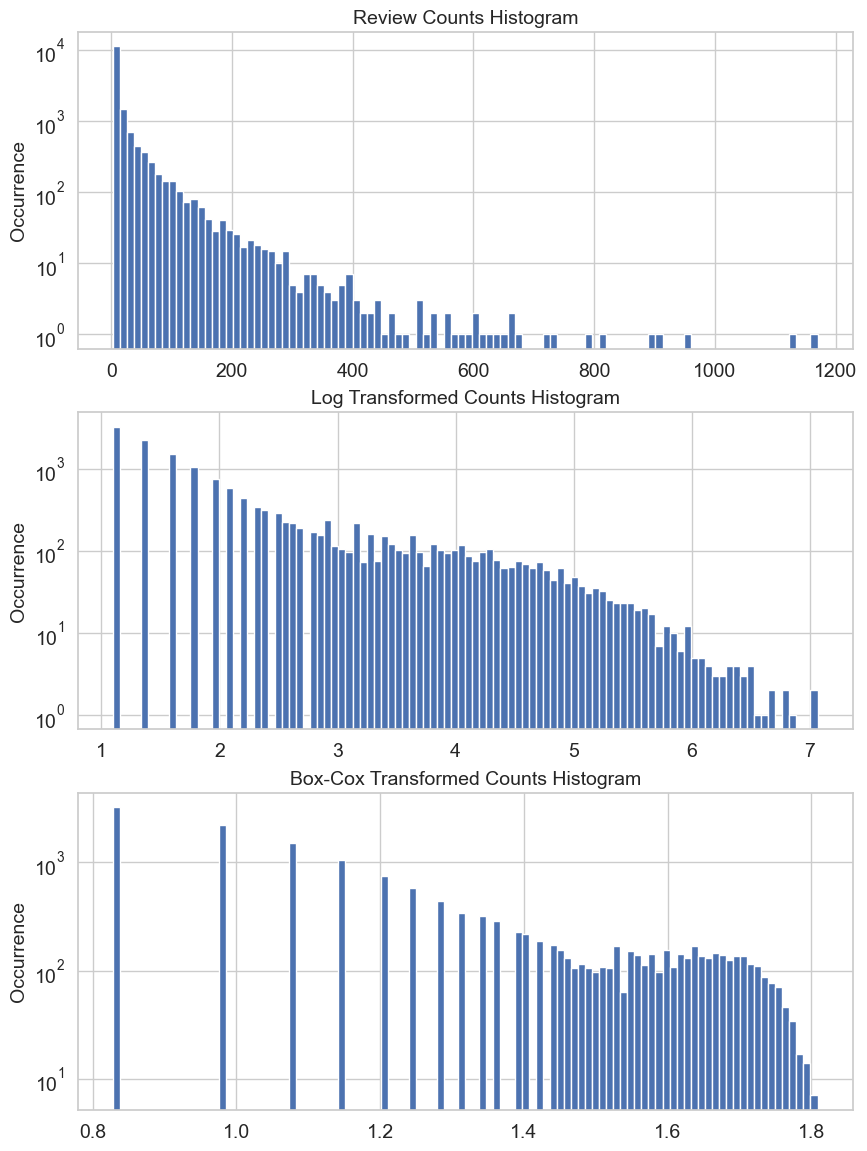

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 14))

# 원본 리뷰 카운트 히스토그램
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log', nonpositive='clip')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# 로그 변환된 리뷰 카운트
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log', nonpositive='clip')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# Box-Cox 변환된 리뷰 카운트
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log', nonpositive='clip')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

## **Task 3. Visualizing the histograms of original, log transformed, and Box-Cox transformed athletes numbers (data used in task 1 and task 2)**

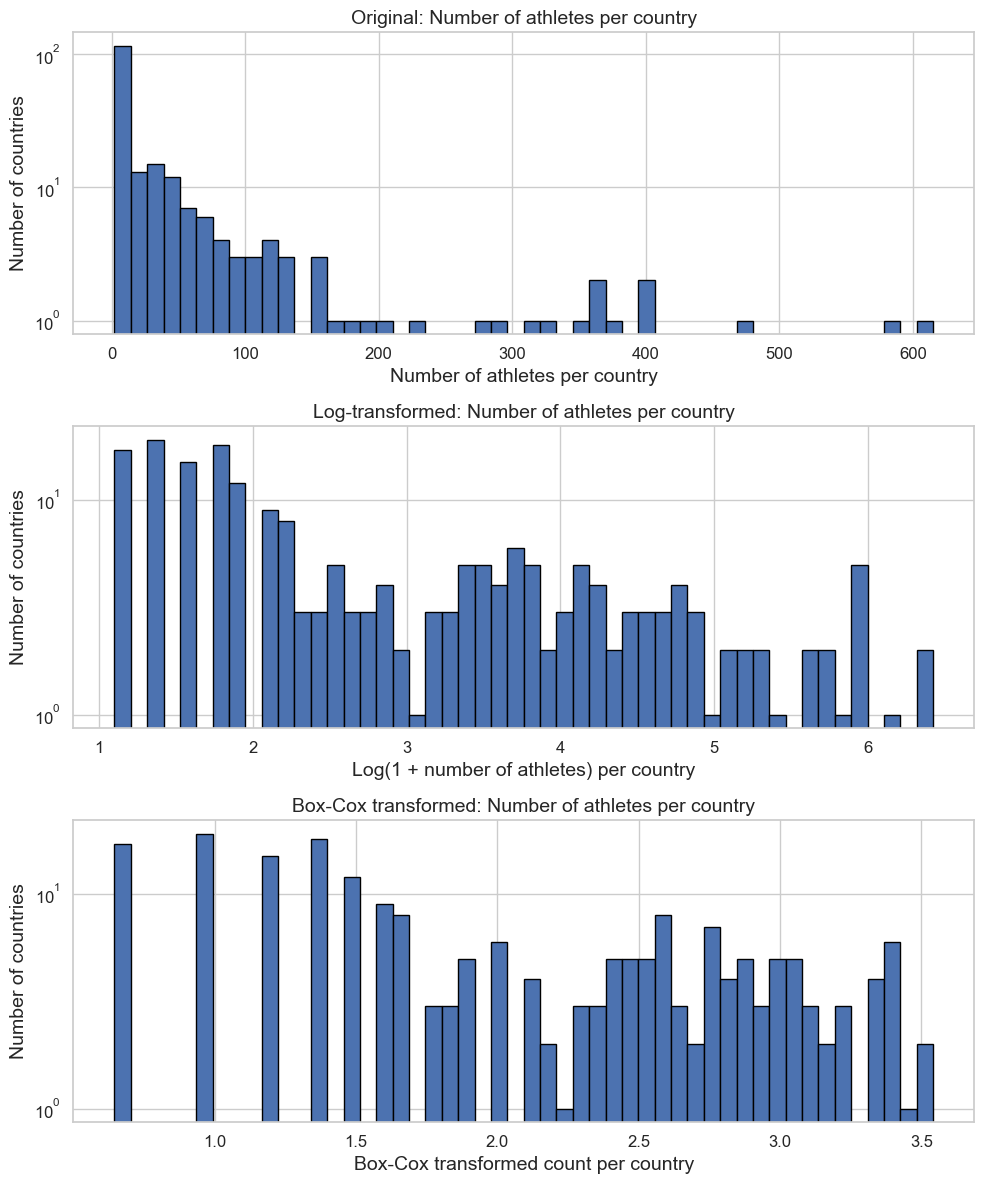

In [ ]:
# Use athletes per country counts from previous tasks
athletes_per_country = Athletes_df['NOC'].value_counts()
counts = athletes_per_country.values

# Log transform
counts_log = np.log1p(counts)

# Box-Cox transform (requires positive values; counts are >= 1 per country)
from scipy.stats import boxcox
counts_bc, _ = boxcox(counts)

# Three histograms: original, log, Box-Cox
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

ax1.hist(counts, bins=50, edgecolor='black')
ax1.set_yscale('log', nonpositive='clip')
ax1.set_xlabel('Number of athletes per country', fontsize=14)
ax1.set_ylabel('Number of countries', fontsize=14)
ax1.set_title('Original: Number of athletes per country', fontsize=14)
ax1.tick_params(labelsize=12)

ax2.hist(counts_log, bins=50, edgecolor='black')
ax2.set_yscale('log', nonpositive='clip')
ax2.set_xlabel('Log(1 + number of athletes) per country', fontsize=14)
ax2.set_ylabel('Number of countries', fontsize=14)
ax2.set_title('Log-transformed: Number of athletes per country', fontsize=14)
ax2.tick_params(labelsize=12)

ax3.hist(counts_bc, bins=50, edgecolor='black')
ax3.set_yscale('log', nonpositive='clip')
ax3.set_xlabel('Box-Cox transformed count per country', fontsize=14)
ax3.set_ylabel('Number of countries', fontsize=14)
ax3.set_title('Box-Cox transformed: Number of athletes per country', fontsize=14)
ax3.tick_params(labelsize=12)
plt.tight_layout()
plt.show()


## Question 2. Listing another transform method other than log and box-cox transform. Explain when to use them.

**Answer to Q2:** write your answer here

---


## Feature scaling example
**Online News Popularity Dataset**: https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip

In [ ]:
import sklearn.preprocessing as preproc

In [ ]:
news_df = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv', delimiter=', ',engine = 'python')
news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
# Min-max scaling
news_df['minmax'] = preproc.minmax_scale(news_df[['n_tokens_content']])
news_df['minmax'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726], shape=(39644,))

In [ ]:
# Standardization
news_df['standardized'] = preproc.StandardScaler().fit_transform(news_df[['n_tokens_content']])
news_df['standardized'].values

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689], shape=(39644,))

In [ ]:
# L2-normalization
news_df['l2_normalized'] = preproc.normalize(news_df[['n_tokens_content']], axis=0)
news_df['l2_normalized'].values

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283], shape=(39644,))

Text(0.5, 44.249999999999986, 'L2-normalized word count')

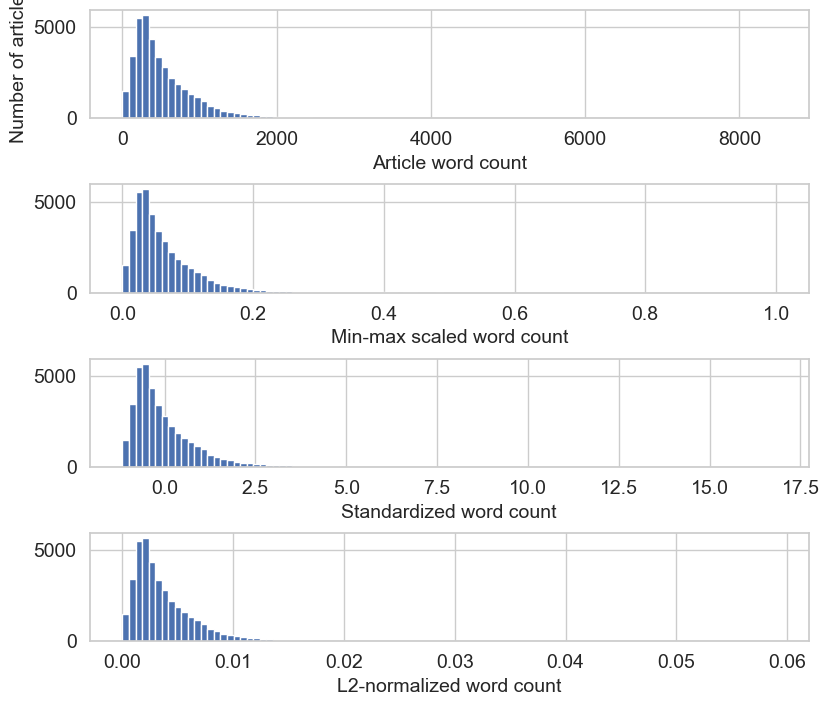

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8, 7))
fig.tight_layout(h_pad=2.0)

news_df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

news_df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
# ax2.set_ylabel('Number of articles', fontsize=14)

news_df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
# ax3.set_ylabel('Number of articles', fontsize=14)

news_df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
# ax4.set_ylabel('Number of articles', fontsize=14)

##  Task 4. Visualizing the histograms of original and scaled data (the data used in the previous tasks)

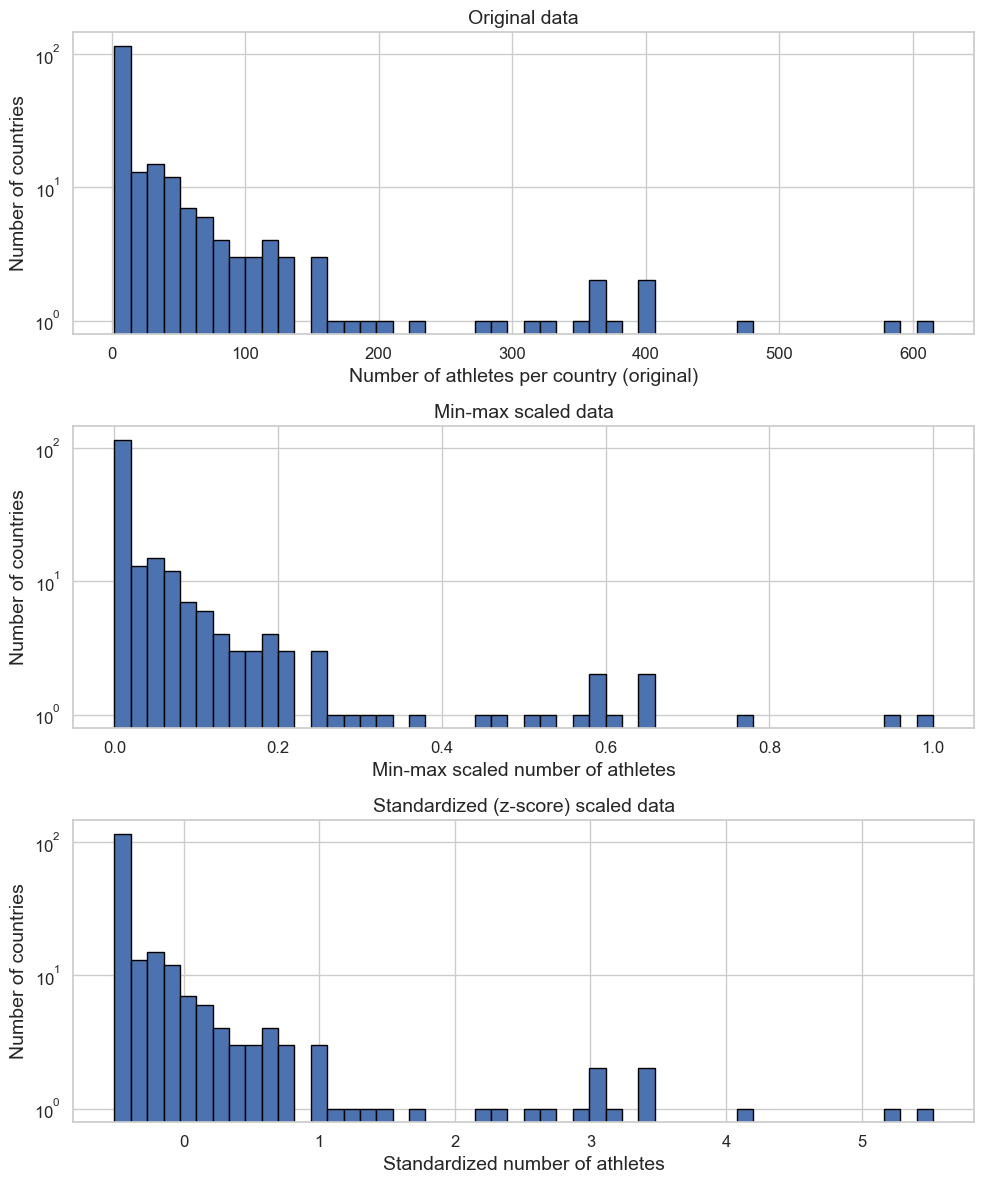

In [ ]:
# Data from previous tasks: number of athletes per country
athletes_per_country = Athletes_df['NOC'].value_counts()
counts = athletes_per_country.values.reshape(-1, 1)

# Scale the data (min-max and standard)
import sklearn.preprocessing as preproc
counts_minmax = preproc.minmax_scale(counts)
counts_standardized = preproc.StandardScaler().fit_transform(counts)

# Visualize: original and scaled histograms
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

ax1.hist(counts, bins=50, edgecolor='black')
ax1.set_yscale('log', nonpositive='clip')
ax1.set_xlabel('Number of athletes per country (original)', fontsize=14)
ax1.set_ylabel('Number of countries', fontsize=14)
ax1.set_title('Original data', fontsize=14)
ax1.tick_params(labelsize=12)

ax2.hist(counts_minmax, bins=50, edgecolor='black')
ax2.set_yscale('log', nonpositive='clip')
ax2.set_xlabel('Min-max scaled number of athletes', fontsize=14)
ax2.set_ylabel('Number of countries', fontsize=14)
ax2.set_title('Min-max scaled data', fontsize=14)
ax2.tick_params(labelsize=12)

ax3.hist(counts_standardized, bins=50, edgecolor='black')
ax3.set_yscale('log', nonpositive='clip')
ax3.set_xlabel('Standardized number of athletes', fontsize=14)
ax3.set_ylabel('Number of countries', fontsize=14)
ax3.set_title('Standardized (z-score) scaled data', fontsize=14)
ax3.tick_params(labelsize=12)
plt.tight_layout()
plt.show()


## Question 3. Comparing the four histograms, listing the similarities and differences between them.

**Answer to Q3**: type your answer here

---


## Question 4. Comparing the histograms of feature scaling and the histograms of transforms, listing the main difference between them.

**Answer to Q4:** type your answer here

---


## Example of interaction features in prediction

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc

In [ ]:
news_df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [ ]:
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
            'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
            'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
            'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']

In [ ]:
X = news_df[features]
y = news_df[['shares']]

X.shape

(39644, 17)

In [ ]:
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)

In [ ]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and score on the test set"""
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [ ]:
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)

(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0111475204


## Task 5. Interaction features in prediction with dry bean dataset
**Dry bean dataset**: https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip

**note:** Try to encode categorical data into numeric data (the last column 'class') first.
Then apply the interation features and compare the r-squared scores of the singleton features and the interaction features

In [ ]:
# Load Dry Bean dataset (download from UCI if needed:
# https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip)
import os
bean_path = 'DryBeanDataset/Dry_Bean_Dataset.xlsx'
if not os.path.exists(bean_path):
    bean_path = 'DryBeanDataset/Dry_Bean_Dataset.csv'
if not os.path.exists(bean_path):
    bean_path = 'Dry_Bean_Dataset.csv'
if bean_path.endswith('.csv'):
    bean_df = pd.read_csv(bean_path)
else:
    bean_df = pd.read_excel(bean_path)

# Encode the last column 'Class' to numeric
from sklearn.preprocessing import LabelEncoder
le_bean = LabelEncoder()
class_col = bean_df.columns[-1]  # 'Class' or last column
bean_df['Class_numeric'] = le_bean.fit_transform(bean_df[class_col].astype(str))

# Features: all columns except the class and encoded class
feature_cols = [c for c in bean_df.columns if c not in [class_col, 'Class_numeric']]
X_bean = bean_df[feature_cols]
y_bean = bean_df[['Class_numeric']]

# Singleton features vs interaction (polynomial) features
X1_bean = X_bean
X2_bean = preproc.PolynomialFeatures(include_bias=False).fit_transform(X_bean)

X1_train_b, X1_test_b, X2_train_b, X2_test_b, y_train_b, y_test_b = train_test_split(
    X1_bean, X2_bean, y_bean, test_size=0.3, random_state=123
)

# Compare R-squared scores
(m1_b, r1_b) = evaluate_feature(X1_train_b, X1_test_b, y_train_b, y_test_b)
(m2_b, r2_b) = evaluate_feature(X2_train_b, X2_test_b, y_train_b, y_test_b)

print('R-squared score with singleton features: %0.5f' % r1_b)
print('R-squared score with pairwise (interaction) features: %0.10f' % r2_b)


R-squared score with singleton features: 0.57668
R-squared score with pairwise (interaction) features: 0.6471913060
